In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ShallowNetwork

# Test for RMSE

Let's test if the written shallow network class works for a simple case of fitting it to the cosine function with the RMSE loss function.

In [2]:
X = np.arange(0, 2 * np.pi, 0.03)
X = X.reshape((X.shape[0], 1, 1))
Y = np.sin(X)

## Definining loss functions

In [3]:
def loss_function_single_point(self, point, ground_truth):
        N = self.forward_pass(point, 0)
        loss = np.sqrt(((N - ground_truth) ** 2).sum())
        return loss

In [4]:
def loss_function_all(self, samples, labels):
        loss = 0
        n_inv = len(samples) ** -1
        for i in range(samples.shape[0]):
            loss += self.loss_function_single_point(self, samples[i], labels[i]) ** 2
        loss *= n_inv
        loss = np.sqrt(loss)
        return loss

## Defining the update rules

In [5]:
def bias_change_point(self, point, label):
  db = np.zeros((self.hidden_dim, 1)).astype(dtype="float64")
  change = self.forward_pass(point, 0) - label
  loss = self.loss_function_single_point(self, point, label)
  db_N = self.network_derivative_bias(point, 0)
  for m in range(self.hidden_dim):
    for j in range(self.visible_dim):
      db[m] += change[j] * db_N[j, 0, m]
  db /= loss
  return db

In [6]:
def hidden_weights_change_point(self, point, label):
  dH = np.zeros((self.hidden_dim, self.input_dim)).astype(dtype="float64")
  change = self.forward_pass(point, 0) - label
  loss = self.loss_function_single_point(self, point, label)
  dH_N = self.network_derivative_hidden_weights(point, 0)
  for m in range(self.hidden_dim):
    for p in range(self.input_dim):
      for j in range(self.visible_dim):
        dH[m, p] += change[j] * dH_N[j, 0, m, p]
  dH /= loss
  return dH

In [7]:
def visible_weights_change_point(self, point, label):
  dV = np.zeros((self.visible_dim, self.hidden_dim)).astype(dtype="float64")
  change = self.forward_pass(point, 0) - label
  loss = self.loss_function_single_point(self, point, label)
  dV_N = self.network_derivative_visible_weights(point, 0)
  for m in range(self.visible_dim):
    for p in range(self.hidden_dim):
      for j in range(self.visible_dim):
        dV[m, p] += change[j] * dV_N[j, 0, m, p]
  dV /= loss
  return dV

## Defining the netowork for the task

In [8]:
network = ShallowNetwork.ShallowNetwork(loss_function=loss_function_all,
                                        loss_function_single_point=loss_function_single_point,
                                       bias_change=bias_change_point,
                                       hidden_weights_change=hidden_weights_change_point,
                                       visible_weights_change=visible_weights_change_point,
                                       hidden_dim=50, unsupervised=False, momentum=0, learning_rate=0.1)

In [9]:
network.train(samples=X, labels=Y, epochs=10)

Epoch: 1 Loss function: 1.7886305557606883
Epoch: 2 Loss function: 0.5744654691113517
Epoch: 3 Loss function: 0.332274252575229
Epoch: 4 Loss function: 0.9650008848031821
Epoch: 5 Loss function: 0.8786338638292005
Epoch: 6 Loss function: 0.4037528784519482
Epoch: 7 Loss function: 0.6067834002539966
Epoch: 8 Loss function: 0.5168317829076982
Epoch: 9 Loss function: 0.7144177535701184
Epoch: 10 Loss function: 0.3854016409827349


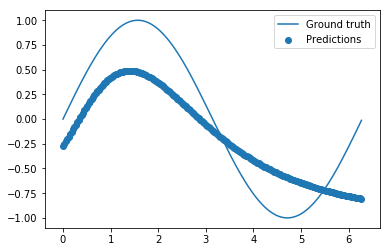

In [10]:
Y2 = np.array([network.forward_pass(X[i], 0) for i in range(X.shape[0])])
Xp = X.reshape((X.shape[0],))
Yp = Y.reshape((Y.shape[0],))
plt.plot(Xp, Yp, label='Ground truth')
plt.scatter(Xp, Y2, label='Predictions')
plt.legend()
plt.show() 

## Trial Solution class

In [11]:
class Trial_Solution:
  def __init__(self, loss_function, loss_function_single_point,
               bias_change, hidden_weights_change, visible_weights_change,
               boundary_condition_value_function, boundary_vanishing_function,
               input_dim=1, hidden_dim=1, output_dim=1, momentum=0, learning_rate=0.1):
    # Dimensions of the Shallow Network
    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim
    
    # Defining all of the three parts of the trial solution f(X)=A(X)+B(X)N(X)
    # A(X) is a function fullfiling the boundary or initial conditions
    self.boundary_condition_value_function = boundary_condition_value_function
    # B(X) is a function vanishing on the boundary or in the initial moment
    self.boundary_vanishing_function = boundary_vanishing_function
    # N(X) is the Shallow Network
    self.network = ShallowNetwork.ShallowNetwork(
      input_dim=self.input_dim, hidden_dim=self.hidden_dim, visible_dim=self.output_dim,
      momentum=momentum, learning_rate=learning_rate, loss_function=loss_function,
      loss_function_single_point=loss_function_single_point, bias_change=bias_change,
      hidden_weights_change=hidden_weights_change, visible_weights_change=visible_weights_change,
      unsupervised=True)

  def predict(self, X):
    return self.boundary_condition_value_function(X)
    + self.boundary_vanishing_function * self.network.forward_pass(X, 0)
    
  def train(self, samples, epochs):
    self.network.train(samples=samples, epochs=epochs, labels=None)

## Example 1

$\frac{d}{dx}\Psi+(x+\frac{1+3x^2}{1+x+x^3})\Psi=x^3+2x+x^2\frac{1+3x^2}{1+x+x^3}$

With boundary initial condition $\Psi(0)=1$ and domain $x\in[0,1]$

In [31]:
Xe1 = np.arange(0,1,0.1).reshape((10,1)) + 1e-6

In [34]:
Xe1

array([[  1.00000000e-06],
       [  1.00001000e-01],
       [  2.00001000e-01],
       [  3.00001000e-01],
       [  4.00001000e-01],
       [  5.00001000e-01],
       [  6.00001000e-01],
       [  7.00001000e-01],
       [  8.00001000e-01],
       [  9.00001000e-01]])

In [13]:
def example1_initial_value(point):
  return 1

In [14]:
def example1_boundary_vanishing(point):
  return point

In [56]:
def example1_loss_function_single_point(self, point, non_squared=False, *kwargs):
  N = self.forward_pass(point, 0)
  dN = self.forward_pass(point, 1)
  loss = (
      point * dN + N + (point + (1 + 3 * point ** 2)/(1 + point + point ** 3)) * (1 + point * N) 
      - point ** 3 - 2 * point - (1 + 3 * point ** 2)/(1 + point + point ** 3)
    )
  if not non_squared:
    loss = loss ** 2
  return loss[0,0]

In [57]:
def example1_loss_function(self, samples, *kwargs):
  loss = 0
  for i in range(samples.shape[0]):
    loss += self.loss_function_single_point(self, samples[i])
  return loss/samples.shape[0]

In [71]:
def example1_bias_change(self, point, label, *kwargs):
  db = np.zeros((self.hidden_dim, 1)).astype(dtype="float64")
  loss_sqrt = self.loss_function_single_point(self, point, non_squared=True)
  db_N = self.network_derivative_bias(point, 0)
  db_DN = self.network_derivative_bias(point, 1)
  point = point.reshape((1,))
  for m in range(self.hidden_dim):
    db[m] += 2 * loss_sqrt * (
      point * db_DN[0, 0, m] + db_N[0, 0, m] + (point + (1 + 3 * point ** 2)/(1 + point + point ** 3)) * point * db_N[0, 0, m])
  return db

In [76]:
def example1_hidden_weights_change(self, point, *kwargs):
  dH = np.zeros((self.hidden_dim, self.input_dim)).astype(dtype="float64")
  loss_sqrt = self.loss_function_single_point(self, point, non_squared=True)
  dH_N = self.network_derivative_hidden_weights(point, 0)
  dH_DN = self.network_derivative_hidden_weights(point, 1)
  for m in range(self.hidden_dim):
    for p in range(self.input_dim):
      dH[m, p] += 2 * loss_sqrt * (
        point * dH_DN[0, 0, m, p] + dH_N[0, 0, m, p] + (point + (1 + 3 * point ** 2)/(1 + point + point ** 3)) * point * dH_N[0, 0, m, p])
  return dH

In [77]:
def example1_visible_weights_change(self, point, *kwargs):
  dV = np.zeros((self.visible_dim, self.hidden_dim)).astype(dtype="float64")
  loss_sqrt = self.loss_function_single_point(self, point, non_squared=True)
  dV_N = self.network_derivative_visible_weights(point, 0)
  dV_DN = self.network_derivative_visible_weights(point, 1)
  for m in range(self.visible_dim):
    for p in range(self.hidden_dim):
      dV[m, p] += 2 * loss_sqrt * (
        point * dV_DN[0, 0, m, p] + dV_N[0, 0, m, p] + (point + (1 + 3 * point ** 2)/(1 + point + point ** 3)) * point * dV_N[0, 0, m, p])
  return dV

In [95]:
example1_trial_solution = Trial_Solution(loss_function=example1_loss_function,
                                        loss_function_single_point=example1_loss_function_single_point,
                                        bias_change=example1_bias_change,
                                        hidden_weights_change=example1_hidden_weights_change,
                                        visible_weights_change=example1_visible_weights_change,
                                        boundary_condition_value_function=example1_initial_value,
                                        boundary_vanishing_function=example1_boundary_vanishing,
                                        input_dim=1, hidden_dim=10, output_dim=1)

In [96]:
example1_trial_solution.train(Xe1, 5)

Epoch: 1 Loss function: 0.0008360554456967965
Epoch: 2 Loss function: 0.0018978668658467027
Epoch: 3 Loss function: 0.0007627108648668408
Epoch: 4 Loss function: 0.0008149188069434862
Epoch: 5 Loss function: 0.0013055627030457016


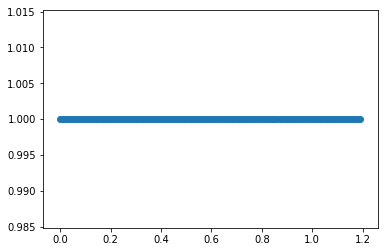

In [97]:
Xe1plot = np.arange(0,1.2, 0.01)
Ye1 = np.array([example1_trial_solution.predict(Xe1plot[i]) for i in range(Xe1plot.shape[0])])
plt.scatter(Xe1plot, Ye1)
plt.show()